# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [229]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [12]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
df.shape

(50000, 14)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

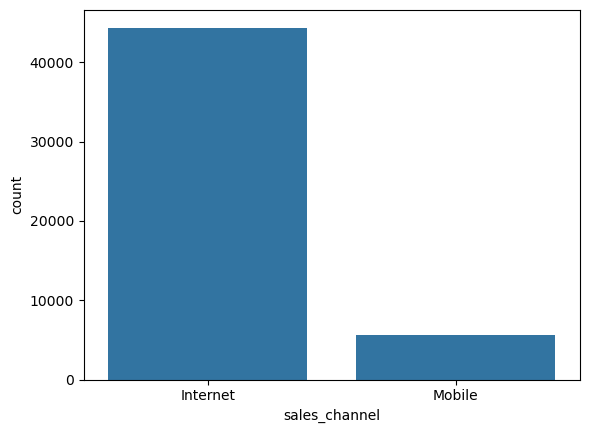

In [205]:
sns.barplot(df['sales_channel'].value_counts())
plt.show()

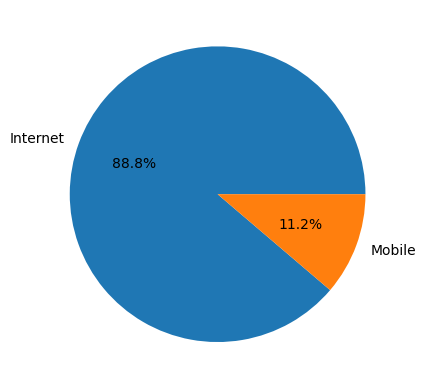

In [211]:
labels=['Internet','Mobile']
plt.pie(df['sales_channel'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

In [17]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

<Axes: xlabel='trip_type', ylabel='count'>

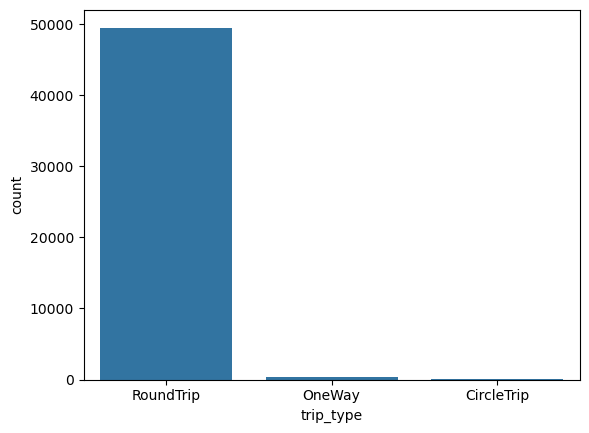

In [18]:
sns.barplot(df['trip_type'].value_counts() )

In [19]:
df['booking_origin'].value_counts().nlargest(10)

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: count, dtype: int64

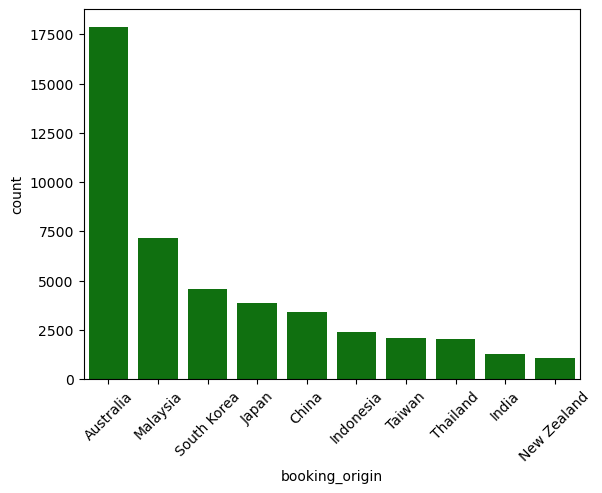

In [20]:
sns.barplot(df['booking_origin'].value_counts().nlargest(10), color='green')
plt.xticks(rotation=45)
plt.show()

In [21]:
df['booking_origin'].value_counts().nsmallest(10)

booking_origin
Vanuatu       1
Czechia       1
Malta         1
Gibraltar     1
Belarus       1
Pakistan      1
Iraq          1
Ghana         1
Seychelles    1
Guatemala     1
Name: count, dtype: int64

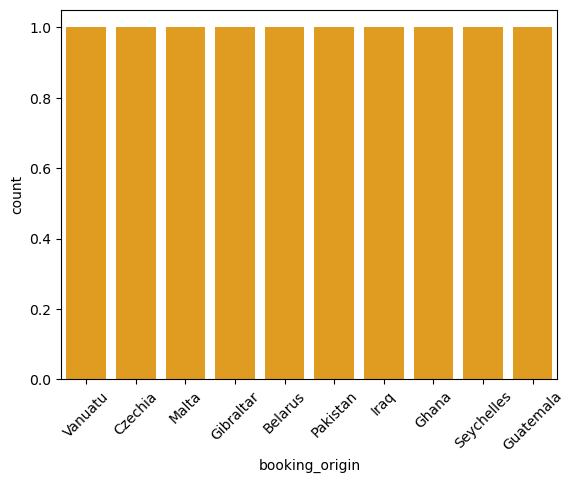

In [22]:
sns.barplot(df['booking_origin'].value_counts().nsmallest(10), color='orange')
plt.xticks(rotation=45)
plt.show()

In [23]:
df['route'].value_counts().nlargest(10)

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: count, dtype: int64

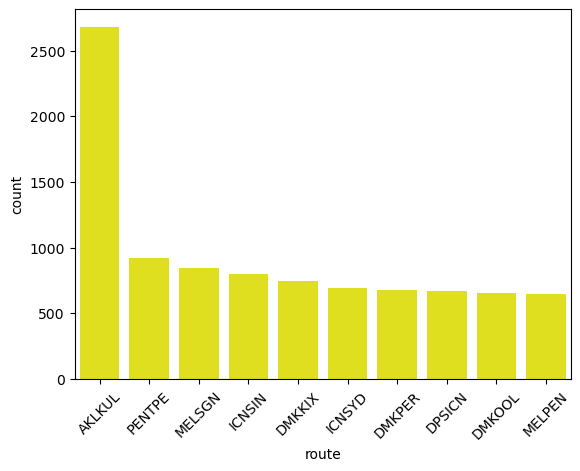

In [24]:
sns.barplot(df['route'].value_counts().nlargest(10), color='yellow')
plt.xticks(rotation=45)
plt.show()

In [25]:
df['route'].value_counts().nsmallest(10)

route
CKGHKT    1
AORPER    1
URTXIY    1
TPEURT    1
BTUWUH    1
MRUTPE    1
CNXXIY    1
MELNRT    1
PERSWA    1
KIXLBU    1
Name: count, dtype: int64

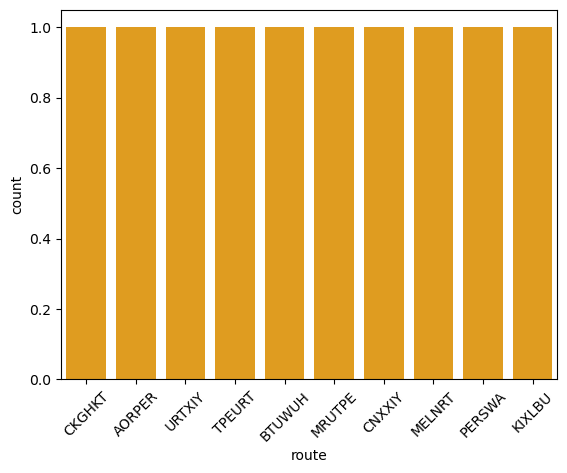

In [26]:
sns.barplot(df['route'].value_counts().nsmallest(10), color='orange')
plt.xticks(rotation=45)
plt.show()

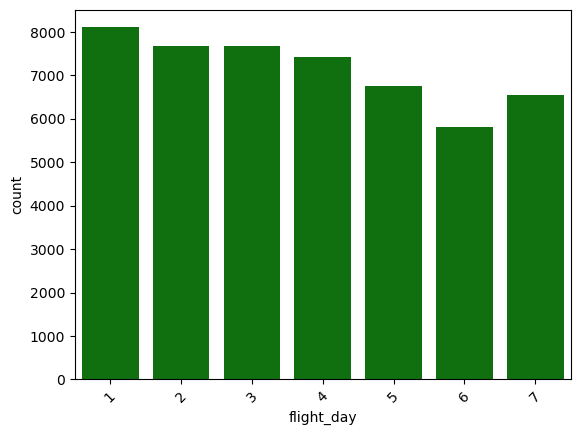

In [215]:
sns.barplot(df['flight_day'].value_counts().nlargest(10), color='green')
plt.xticks(rotation=45)
plt.show()

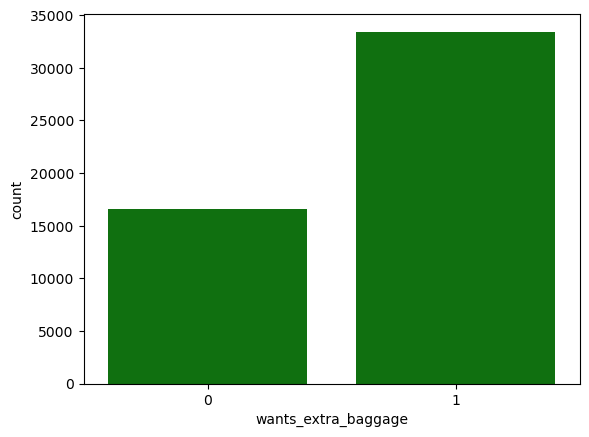

In [28]:
sns.barplot(df['wants_extra_baggage'].value_counts(), color='green')
plt.show()

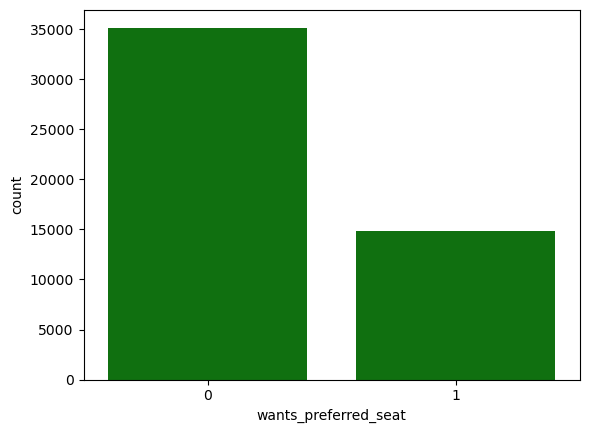

In [29]:
sns.barplot(df['wants_preferred_seat'].value_counts(), color='green')
plt.show()

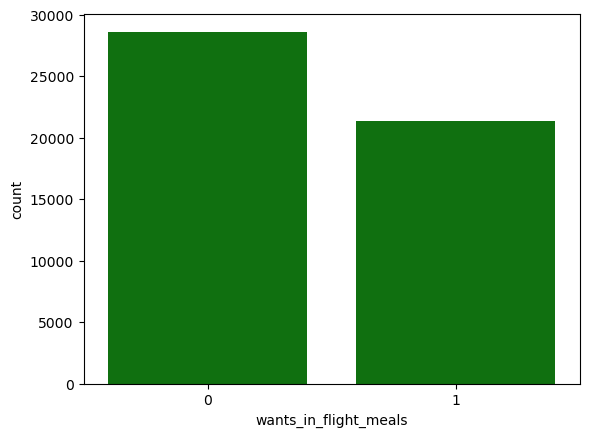

In [30]:
sns.barplot(df['wants_in_flight_meals'].value_counts(), color='green')
plt.show()

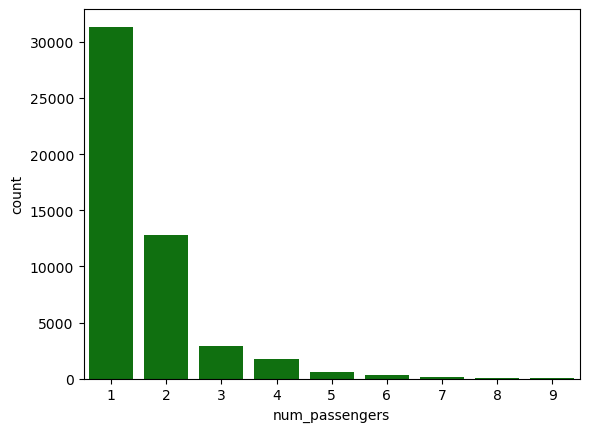

In [31]:
sns.barplot(df['num_passengers'].value_counts(), color='green')
plt.show()

In [32]:
df['purchase_lead'].value_counts().nlargest(10)

purchase_lead
1     685
2     670
6     653
7     638
5     615
13    606
4     606
8     597
9     593
20    589
Name: count, dtype: int64

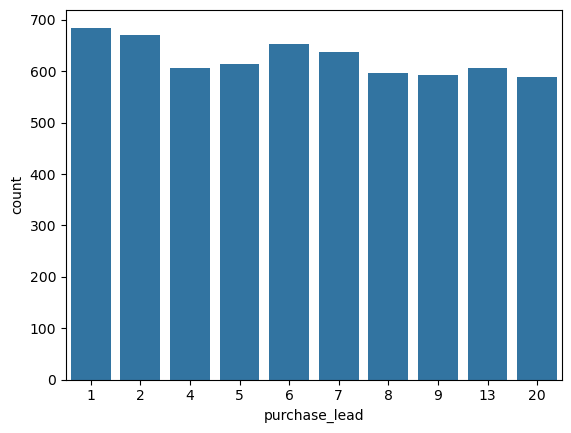

In [33]:
sns.barplot(df['purchase_lead'].value_counts().nlargest(10))
plt.show()

In [34]:
df['purchase_lead'].value_counts().nsmallest(10)

purchase_lead
483    1
553    1
606    1
477    1
435    1
605    1
495    1
633    1
625    1
514    1
Name: count, dtype: int64

In [35]:
(df['purchase_lead'].value_counts()==1).value_counts()

count
False    444
True      26
Name: count, dtype: int64

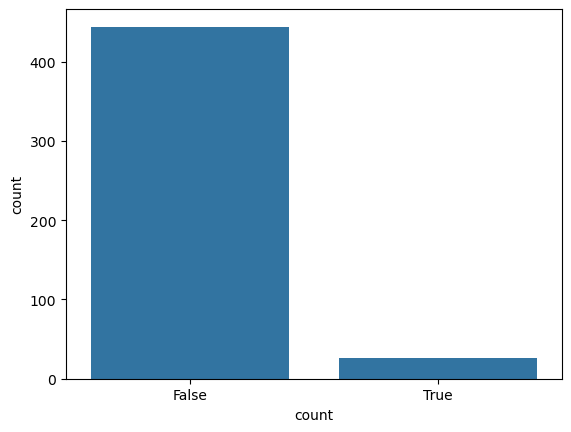

In [36]:
sns.barplot((df['purchase_lead'].value_counts()==1).value_counts())
plt.show()

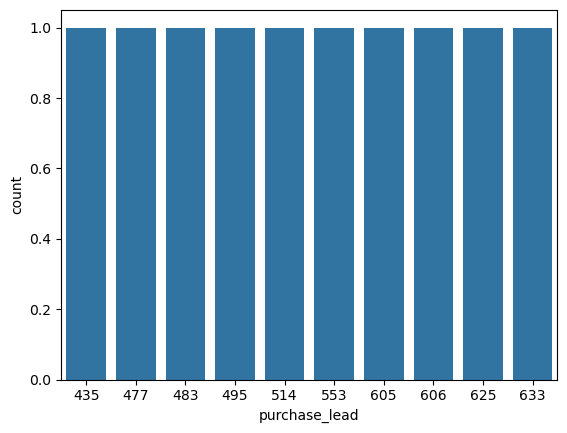

In [37]:
sns.barplot(df['purchase_lead'].value_counts().nsmallest(10))
plt.show()

In [38]:
df['length_of_stay'].value_counts().nlargest(10)

length_of_stay
6     7757
5     7286
4     5655
3     2839
17    1849
21    1392
18    1356
22    1285
20    1285
19    1253
Name: count, dtype: int64

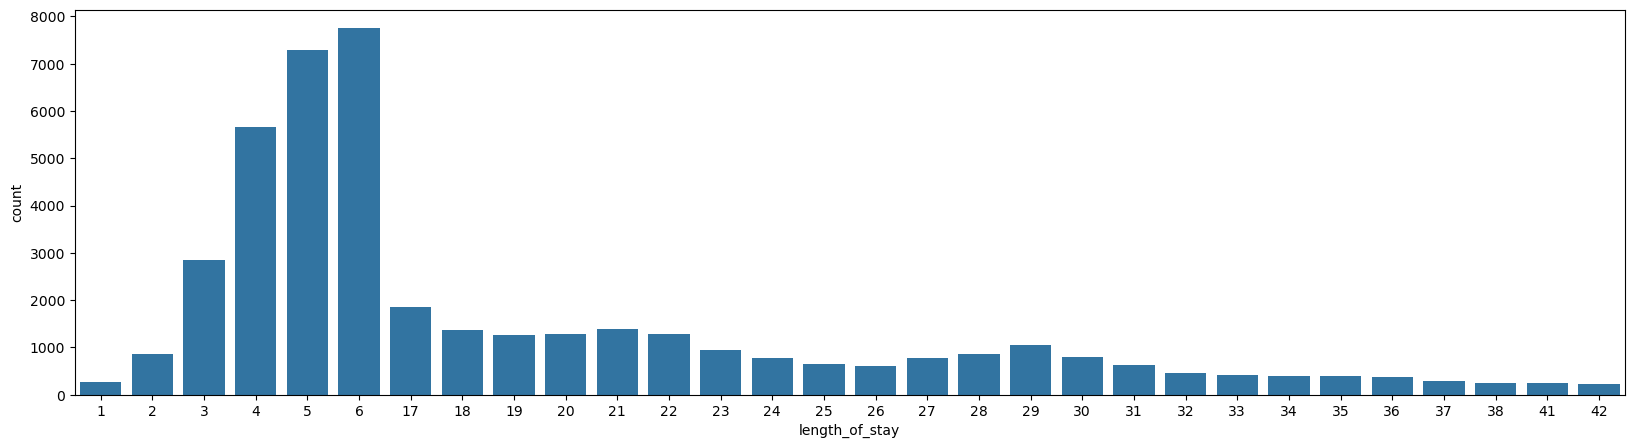

In [225]:
plt.figure(figsize=(20,5))
sns.barplot(df['length_of_stay'].value_counts().nlargest(30))
plt.show()

In [40]:
df['length_of_stay'].value_counts().nsmallest(10)

length_of_stay
303    1
577    1
276    1
435    1
517    1
339    1
197    1
294    1
462    1
247    1
Name: count, dtype: int64

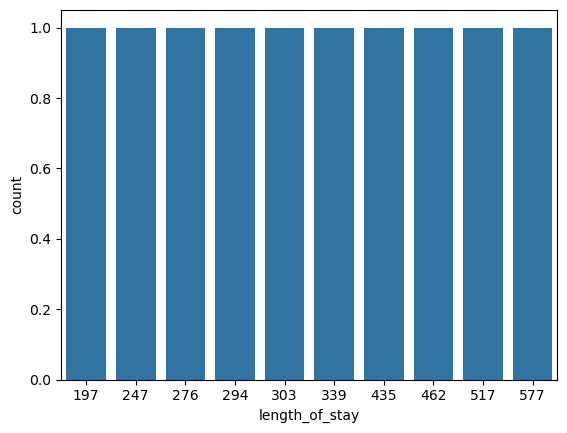

In [41]:
sns.barplot(df['length_of_stay'].value_counts().nsmallest(10))
plt.show()

In [42]:
df['flight_hour'].value_counts()

flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64

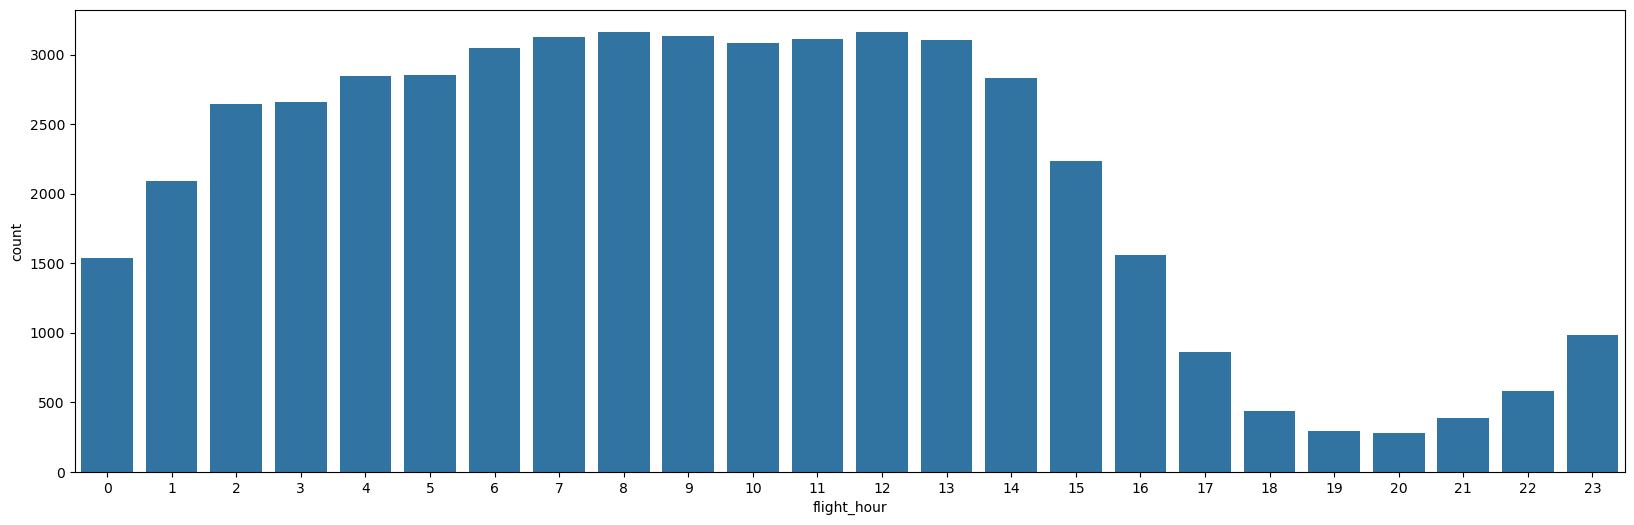

In [253]:
plt.figure(figsize=(20,6))
sns.barplot(df['flight_hour'].value_counts())
plt.show()

In [44]:
df.groupby('trip_type')['purchase_lead'].mean()

trip_type
CircleTrip    95.293103
OneWay        91.547804
RoundTrip     84.864557
Name: purchase_lead, dtype: float64

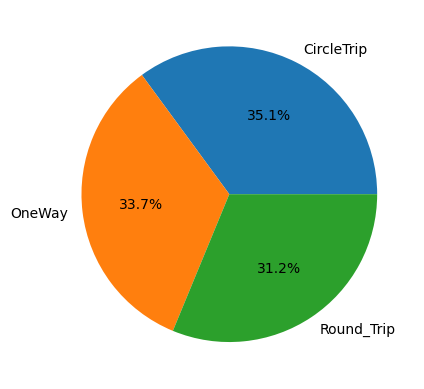

In [45]:
labels=['CircleTrip','OneWay','Round_Trip']
plt.pie(df.groupby('trip_type')['purchase_lead'].mean(), labels=labels, autopct='%1.1f%%')
plt.show()

In [46]:
df.groupby('route')['flight_hour'].mean()

route
AKLDEL    10.100000
AKLHGH     3.000000
AKLHND    20.000000
AKLICN     7.728571
AKLKIX     9.500000
            ...    
TRZWUH    10.000000
TRZXIY    12.666667
TWUWUH     9.000000
TWUXIY     8.714286
URTXIY     3.000000
Name: flight_hour, Length: 799, dtype: float64

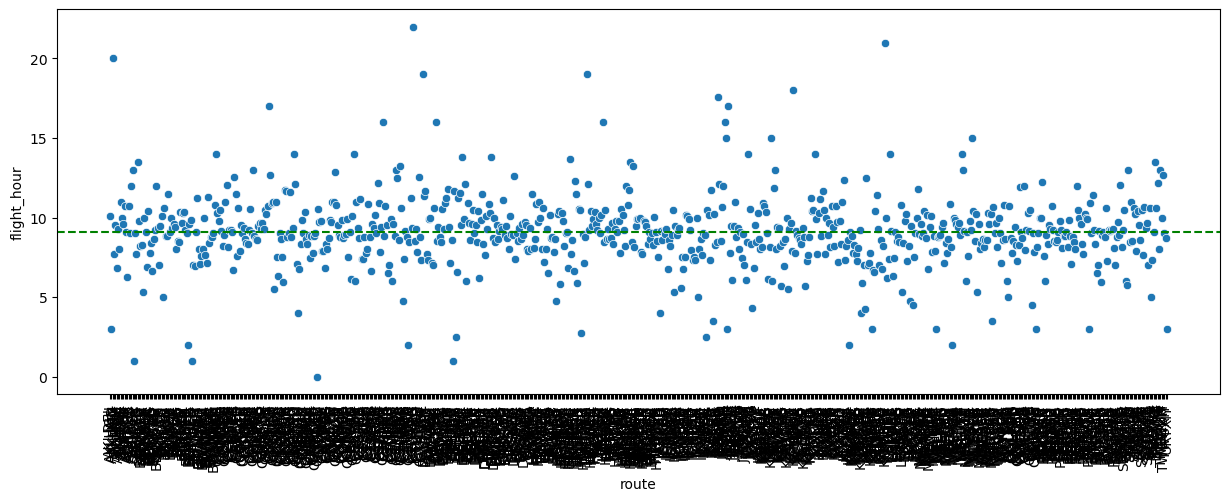

In [235]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.groupby('route')['flight_hour'].mean())
avg_y=np.mean(df['flight_hour'])
plt.axhline(y=avg_y, color='g', linestyle='--', label="Average Line")
plt.xticks(rotation=90)
plt.show()

In [48]:
df.groupby('booking_origin')['length_of_stay'].mean()

booking_origin
(not set)               17.083333
Afghanistan              2.000000
Algeria                  6.000000
Argentina               27.333333
Australia               29.186381
                          ...    
United Arab Emirates    26.285714
United Kingdom          23.895954
United States           18.440789
Vanuatu                  4.000000
Vietnam                 32.917526
Name: length_of_stay, Length: 104, dtype: float64

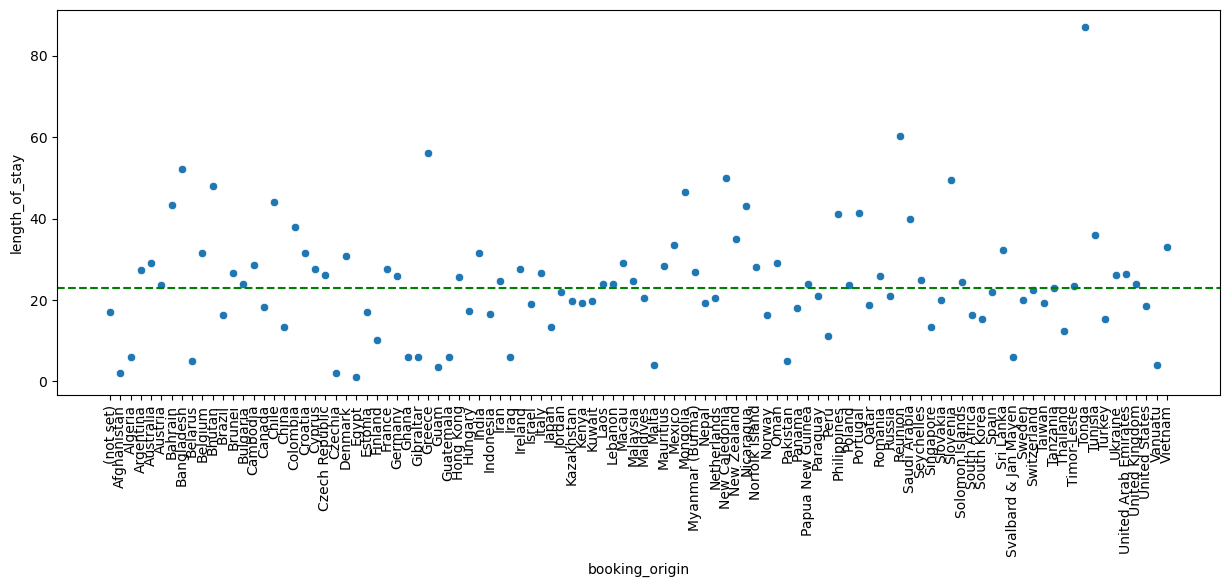

In [241]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.groupby('booking_origin')['length_of_stay'].mean())
avg_y=np.mean(df['length_of_stay'])
plt.axhline(y=avg_y, color='g', linestyle='--', label="Average Line")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='length_of_stay'>

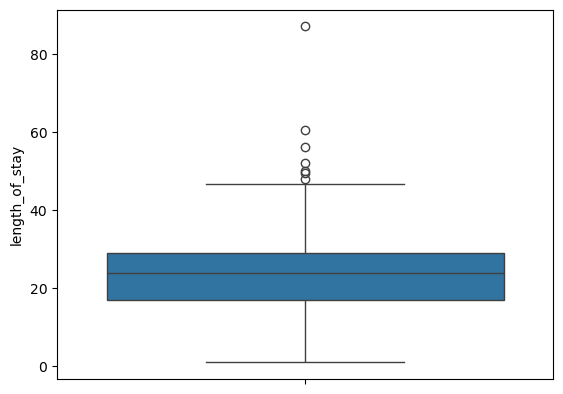

In [50]:
sns.boxplot(df.groupby('booking_origin')['length_of_stay'].mean())

In [51]:
grouped_data=df.groupby(['sales_channel','booking_complete']).size().reset_index(name='count')
grouped_data

,sales_channel,booking_complete,count
0,Internet,0,37513
1,Internet,1,6869
2,Mobile,0,5009
3,Mobile,1,609


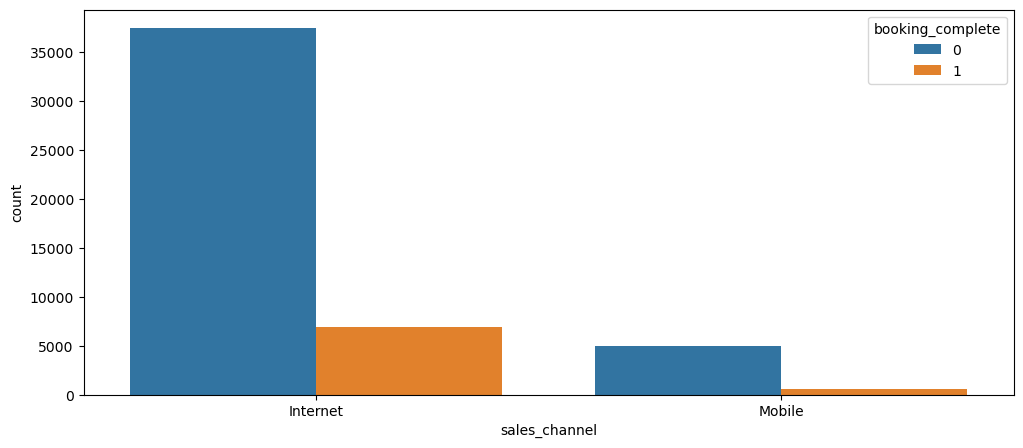

In [251]:
plt.figure(figsize=(12,5))
sns.barplot(data=grouped_data, x='sales_channel', y='count', hue='booking_complete')
plt.show()

In [199]:
country_data=df.groupby('sales_channel')['booking_origin'].value_counts().nlargest(15).reset_index(name='count')
country_data

,sales_channel,booking_origin,count
0,Internet,Australia,16361
1,Internet,Malaysia,6378
2,Internet,South Korea,4126
3,Internet,Japan,3265
4,Internet,China,2771
5,Internet,Indonesia,1984
6,Internet,Taiwan,1860
7,Internet,Thailand,1614
8,Mobile,Australia,1511
9,Internet,India,1109


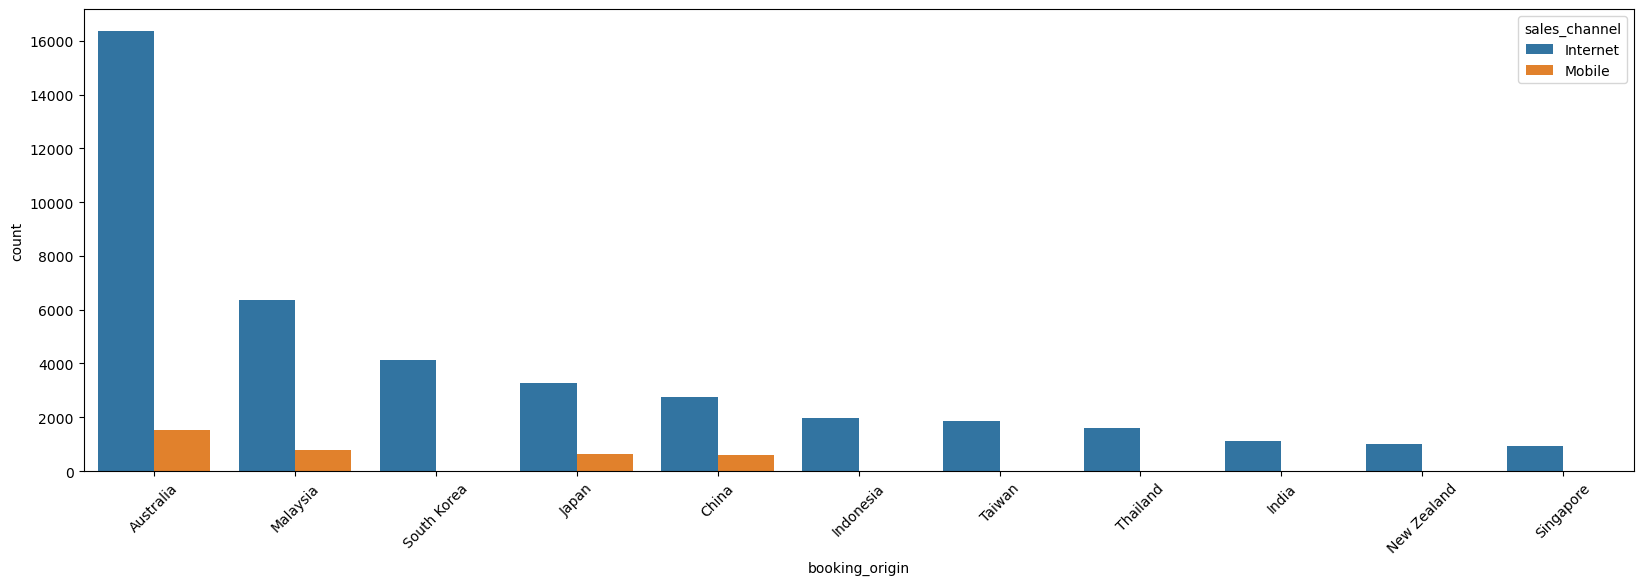

In [201]:
plt.figure(figsize=(20,6))
sns.barplot(data=country_data, x='booking_origin', y='count', hue='sales_channel')
plt.xticks(rotation=45)
plt.show()

In [53]:
total_per_channel = grouped_data.groupby('sales_channel')['count'].transform('sum')

grouped_data['ratio'] = grouped_data['count'] / total_per_channel

In [54]:
grouped_data

,sales_channel,booking_complete,count,ratio
0,Internet,0,37513,0.845230
1,Internet,1,6869,0.154770
2,Mobile,0,5009,0.891598
3,Mobile,1,609,0.108402


In [55]:
day_data=df.groupby('flight_day')['booking_complete'].value_counts().reset_index(name='count')
day_data

,flight_day,booking_complete,count
0,1,0,6898
1,1,1,1204
2,2,0,6544
3,2,1,1129
4,3,0,6422
5,3,1,1252
6,4,0,6302
7,4,1,1122
8,5,0,5778
9,5,1,983


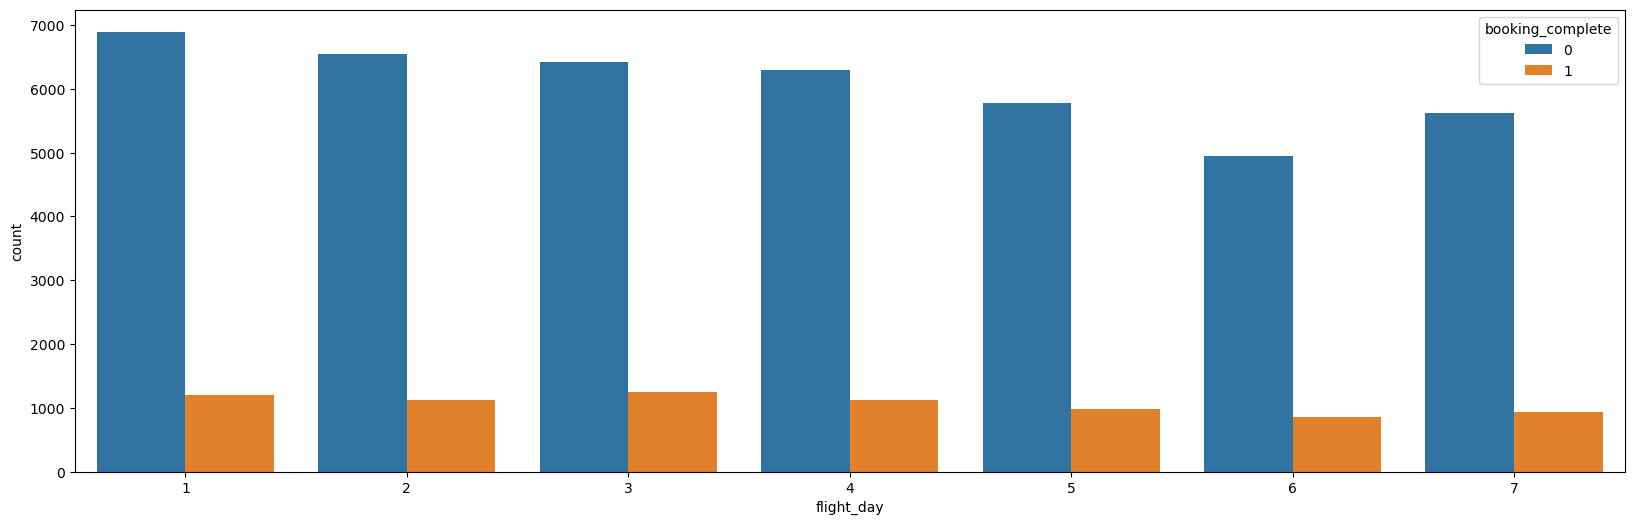

In [243]:
plt.figure(figsize=(20,6))
sns.barplot(data=day_data, x='flight_day', y='count', hue='booking_complete')
plt.show()

In [57]:
total_per_day = day_data.groupby('flight_day')['count'].transform('sum')

day_data['ratio'] = day_data['count'] / total_per_day
day_data

,flight_day,booking_complete,count,ratio
0,1,0,6898,0.851395
1,1,1,1204,0.148605
2,2,0,6544,0.852861
3,2,1,1129,0.147139
4,3,0,6422,0.836852
5,3,1,1252,0.163148
6,4,0,6302,0.848869
7,4,1,1122,0.151131
8,5,0,5778,0.854607
9,5,1,983,0.145393


In [58]:
new_df=df.drop(['sales_channel','trip_type','route','booking_origin'], axis=1)
new_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


In [59]:
new_df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


<Axes: >

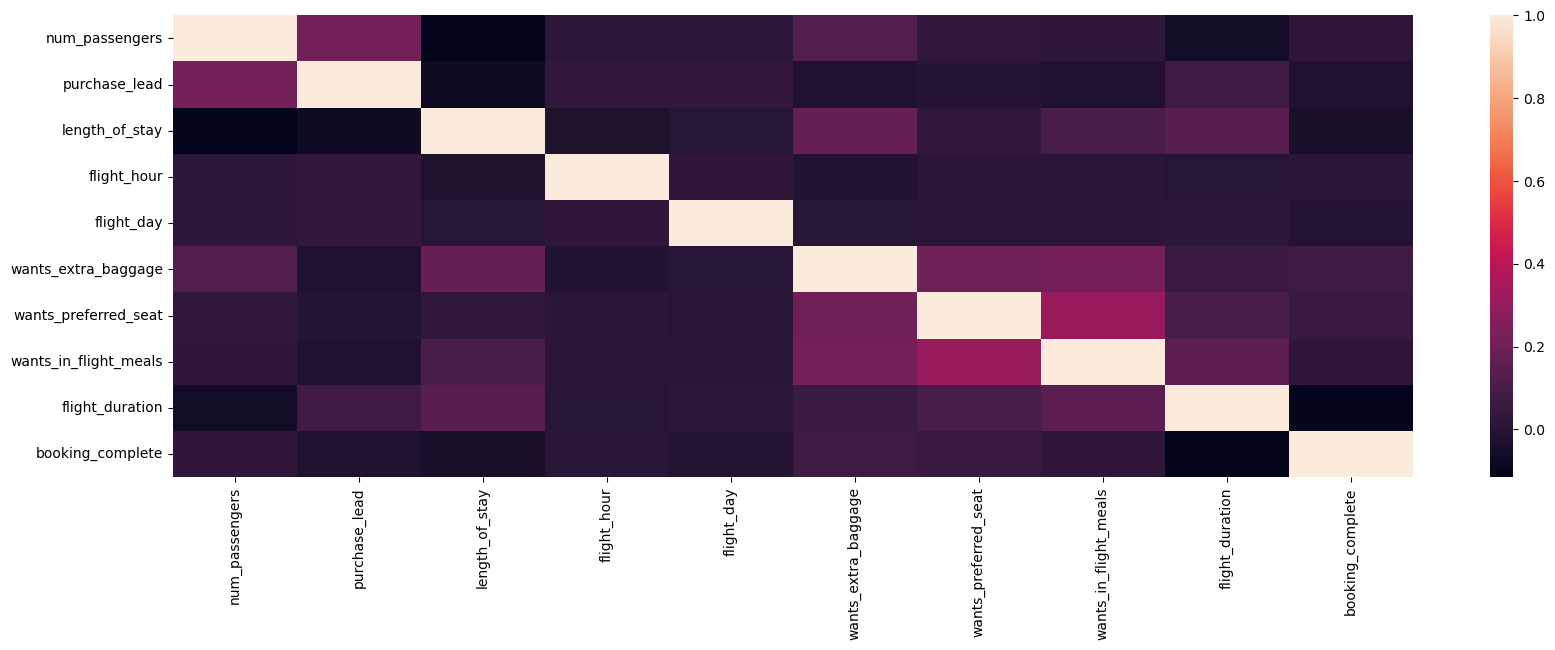

In [245]:
plt.figure(figsize=(20,6))
sns.heatmap(new_df.corr())

In [61]:
# Encoding the Sales_channel and Trip_type

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('booking_complete',axis=1), df['booking_complete'], test_size=0.25)

In [63]:
x_train.shape, x_test.shape

((37500, 13), (12500, 13))

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [65]:
ct=ColumnTransformer([
    ('tr1',OneHotEncoder(sparse_output=False),['sales_channel','trip_type'])
],remainder='passthrough')

In [66]:
x_train_trans=ct.fit_transform(x_train,y_train)
x_test_trans=ct.fit_transform(x_test,y_test)

In [67]:
x_train1=pd.DataFrame(x_train_trans)
x_train1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,1.0,1,31,18,13,2,ICNPER,South Korea,1,0,1,6.62
1,1.0,0.0,0.0,0.0,1.0,2,9,6,17,4,HNDLGK,Japan,1,0,0,7.57
2,1.0,0.0,0.0,0.0,1.0,1,360,5,17,4,DPSPVG,China,0,1,0,5.33
3,1.0,0.0,0.0,0.0,1.0,1,245,24,13,7,KCHTPE,Malaysia,1,0,0,4.67
4,1.0,0.0,0.0,0.0,1.0,1,164,5,16,1,SINTPE,Taiwan,1,0,0,4.67


In [68]:
x_test1=pd.DataFrame(x_test_trans)
x_test1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,1.0,1,15,85,9,7,CNXPER,Thailand,1,1,0,5.62
1,1.0,0.0,0.0,0.0,1.0,1,32,19,15,1,OOLTPE,Australia,0,0,1,8.83
2,1.0,0.0,0.0,0.0,1.0,1,113,4,15,2,PUSSIN,South Korea,0,0,0,6.33
3,1.0,0.0,0.0,0.0,1.0,1,70,31,1,3,HYDMEL,Australia,1,0,1,8.83
4,1.0,0.0,0.0,0.0,1.0,1,13,2,0,3,COKSYD,Australia,1,1,1,8.58


In [69]:
x_train1.drop([10,11], axis=1, inplace=True)
x_test1.drop([10,11], axis=1, inplace=True)

In [70]:
x_train1.head()

,0,1,2,3,4,5,6,7,8,9,12,13,14,15
0,1.0,0.0,0.0,0.0,1.0,1,31,18,13,2,1,0,1,6.62
1,1.0,0.0,0.0,0.0,1.0,2,9,6,17,4,1,0,0,7.57
2,1.0,0.0,0.0,0.0,1.0,1,360,5,17,4,0,1,0,5.33
3,1.0,0.0,0.0,0.0,1.0,1,245,24,13,7,1,0,0,4.67
4,1.0,0.0,0.0,0.0,1.0,1,164,5,16,1,1,0,0,4.67


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)

In [72]:
rf.fit(x_train1,y_train)

RandomForestClassifier(random_state=42)

In [73]:
y_pred=rf.predict(x_test1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.84408

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,x_train1,y_train).mean()

0.8493333333333333